In [1]:
import ROOT
from ROOT import *

import os

Welcome to JupyROOT 6.26/04


In [2]:
filelist=os.listdir('./')

myFiles=[files for files in filelist if '_v1_' in files]
sorted_myFiles = sorted(myFiles)
sorted_myFiles

['VLL2016postVFP_bTagEff_May19_v1_DYJetsToLL_M10To50_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_DYJetsToLL_M50_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_HTbinnedWJets_100to200_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_HTbinnedWJets_200to400_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_HTbinnedWJets_400to600_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_HTbinnedWJets_600to800_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_HTbinnedWJets_70to100_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_HTbinnedWJets_800to1200_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_HTbinnedWJets_Inclusive_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_QCD_MuEnriched_120to170_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_QCD_MuEnriched_15to20_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_QCD_MuEnriched_170to300_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_QCD_MuEnriched_20to30_sample.root',
 'VLL2016postVFP_bTagEff_May19_v1_QCD_MuEnriched_300to470_sample.root',
 'VLL2016postVFP

In [3]:
myFiles[0].split('_sample')[0].split('_v1_')[1]


'SingleTop_tW_Top_InclusiveDecays'

In [4]:
def printbEff(fname,cName):
    
    #Read
    file=TFile.Open(fname,'READ')
    
    #Read Histo
    den = 'LightJet_PtEta'
    num = 'LightJet_Mis_PtEta'
    
    num_histo= file.Get(num)
    den_histo= file.Get(den)

    eff_histo=num_histo.Clone()
    eff_histo.Divide(den_histo)
    
    titlelabel=fname.split('_sample')[0].split('_v1_')[1]
    canvas=TCanvas(cName,"",800,600)
    gStyle.SetOptStat(0)
    eff_histo.GetZaxis().SetRangeUser(0.0,1.0)
    canvas.SetLogx(1)
    eff_histo.Draw('colz text same')
    eff_histo.SetTitle('LightJetMisEff_'+titlelabel)
    canvas.Draw()
    #canvas.SaveAs(f'LightJetMisEff_{titlelabel}.pdf')
    
    
    
    ##printarray
    
    print('For the sample '+ titlelabel+'\n')
    bjeteffarray=[]
    for i in range(1,4):
        foreacheta=[]
        for j in range(2,10):
            #print(f'{i}{j}')
            value= eff_histo.GetBinContent(j,i)
            foreacheta.append(value)
        bjeteffarray.append(foreacheta)
    bjeteffarray

    return canvas,bjeteffarray

In [5]:
sortlabel=['DYJetsToLL','QCD_MuEnriched','ZZ','WZ','WW','SingleTop','HTbinnedWJets','TTBar','VLL_M']


For the sample DYJetsToLL_M50

{{0.02568177320063114, 0.014534643851220608, 0.010985984466969967, 0.009187384508550167, 0.008590449579060078, 0.0117154810577631, 0.02068965509533882, 0.07333333045244217}, {0.0303760077804327, 0.016866417601704597, 0.013376593589782715, 0.012611165642738342, 0.015717465430498123, 0.020859355106949806, 0.03906147554516792, 0.1041666641831398}, {0.03687215968966484, 0.02074502408504486, 0.017297005280852318, 0.017874233424663544, 0.02147965133190155, 0.029656684026122093, 0.05303030461072922, 0.1190476194024086}}




For the sample DYJetsToLL_M10To50

{{0.016245882958173752, 0.009552923031151295, 0.006624710280448198, 0.004946413915604353, 0.0069444444961845875, 0.0045045046135783195, 0.025974025949835777, 0.0}, {0.023333605378866196, 0.010403120890259743, 0.0072215888649225235, 0.008591065183281898, 0.014799154363572598, 0.019801979884505272, 0.0, 0.0}, {0.03188968077301979, 0.01705380715429783, 0.017130620777606964, 0.015325670130550861, 0.0113636367022


For the sample TTBar_TTTo2L2Nu

{{0.04065224900841713, 0.024797260761260986, 0.019265834242105484, 0.0163249708712101, 0.013864965178072453, 0.013379554264247417, 0.02030792087316513, 0.05220302194356918}, {0.0425250269472599, 0.02651764079928398, 0.02123420313000679, 0.01895546354353428, 0.019685005769133568, 0.02232981286942959, 0.040183428674936295, 0.10506588220596313}, {0.04198446869850159, 0.02544889599084854, 0.021023347973823547, 0.01997813768684864, 0.022467633709311485, 0.03193141892552376, 0.05472063645720482, 0.11410707235336304}}




For the sample VLL_M350

{{0.030972516164183617, 0.02217496931552887, 0.024174053221940994, 0.022265391424298286, 0.022670473903417587, 0.02963567152619362, 0.04401864483952522, 0.10661764442920685}, {0.03375108540058136, 0.02667412720620632, 0.026999661698937416, 0.02831067144870758, 0.03518391773104668, 0.03979920968413353, 0.07338017225265503, 0.07194244861602783}, {0.04025854170322418, 0.030042918398976326, 0.02223576046526432, 0.02750565

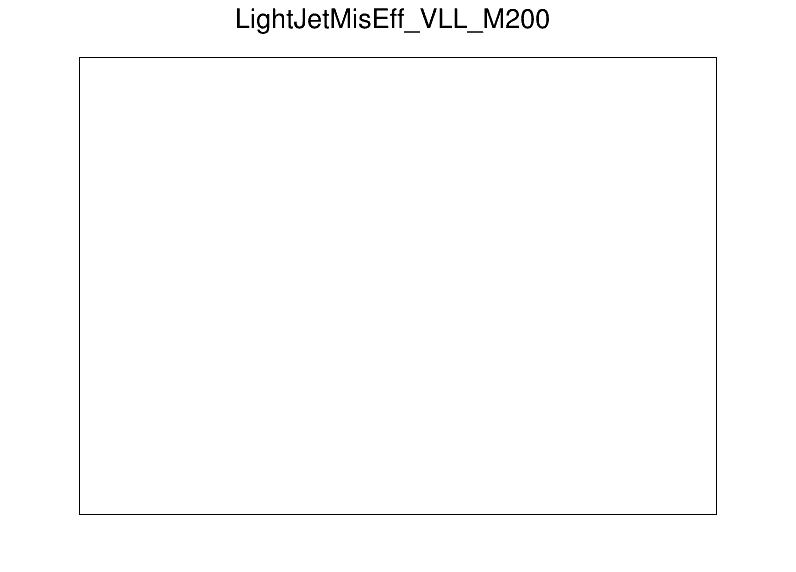

In [6]:
for bkg in sortlabel:
    for index, fname_ in enumerate(myFiles):
        if(bkg in fname_):
            canvas,effarray = printbEff(fname_,'can'+str(index))
            carray=str(effarray).replace('[','{').replace(']','}')
            print(carray)
            print('\n\n\n')